In [6]:
# 1.1.1. Crosstab Analysis: Create a crosstab between the product category and the isBestSeller status.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [10]:
df = pd.read_csv("C:\\Users\\aican\\2025-Ironhack\\Unit5-2025-CW19-20\\Unit5-D1-2025-05-09\\amz_uk_price_prediction_dataset.csv")

In [12]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [16]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [18]:
%matplotlib inline

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [54]:
crosstab_result_2 = pd.crosstab(df['isBestSeller'], df['category'])
crosstab_result_2

category,3D Printers,3D Printing & Scanning,Abrasive & Finishing Products,Action Cameras,Adapters,Agricultural Equipment & Supplies,Alexa Built-In Devices,Art & Craft Supplies,Arts & Crafts,Baby,...,Uninterruptible Power Supply Units & Accessories,Vacuums & Floorcare,Vases,"Water Coolers, Filters & Cartridges",Wearable Technology,Wind Instruments,Window Treatments,Women,Women's Sports & Outdoor Shoes,eBook Readers & Accessories
isBestSeller,,,,,,,,,,,,,,,,,,,,,
False,247,4065,245,1696,251,8421,106,253,9319,14709,...,3652,6919,250,186,8876,243,234,17559,1939,246
True,1,2,5,1,3,109,1,5,230,341,...,1,26,0,1,30,7,5,213,20,0


In [86]:
# 1.1.2. Are there categories where being a best-seller is more prevalent?
# For each category, calculate what percentage is best seller.
# Sort categories from higher to lower percentage of is best seller true.

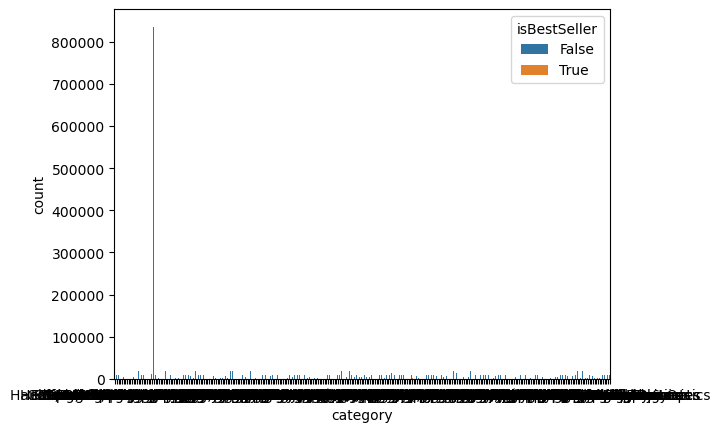

In [110]:
# Grouped bar chart
sns.countplot(data=df, x='category', hue='isBestSeller')
plt.show()

In [96]:
# Calculate the percentage of best sellers per category
category_percentages = df.groupby('category')['isBestSeller'].mean() * 100

category_percentages

category
3D Printers                       0.403226
3D Printing & Scanning            0.049176
Abrasive & Finishing Products     2.000000
Action Cameras                    0.058928
Adapters                          1.181102
                                    ...   
Wind Instruments                  2.800000
Window Treatments                 2.092050
Women                             1.198515
Women's Sports & Outdoor Shoes    1.020929
eBook Readers & Accessories       0.000000
Name: isBestSeller, Length: 296, dtype: float64

In [98]:
category_percentages = category_percentages.sort_values(ascending=False)

category_percentages

category
Grocery                             5.813467
Smart Home Security & Lighting      5.769231
Health & Personal Care              5.768628
Mobile Phone Accessories            4.247104
Power & Hand Tools                  3.533895
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: isBestSeller, Length: 296, dtype: float64

In [104]:
# Filter the DataFrame
top_5_categories_besteller_percentage = ["Grocery", "Smart Home Security & Lighting", "Health & Personal Care", "Mobile Phone Accessories", "Power & Hand Tools"]

In [106]:
# Filter the DataFrame
filtered_df = df[df['category'].isin(top_5_categories_besteller_percentage)]

In [108]:
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
551902,594975,B07PZR3PVB,Apple AirPods with wired Charging Case (2nd ge...,4.7,154266,129.00,True,0,Mobile Phone Accessories
551903,594976,B0BCKHQGJN,"Btootos Wireless Earbuds, Bluetooth 5.3 Headph...",4.5,20964,19.99,True,0,Mobile Phone Accessories
551904,594977,B0BHWFWJYY,"Wireless Earbuds, Bluetooth 5.3 Headphones NEW...",4.6,4969,17.42,False,0,Mobile Phone Accessories
551905,594978,B0BDJ6QBTL,Apple AirPods (3rd generation) with Lightning ...,4.6,23608,169.00,False,0,Mobile Phone Accessories
551906,594979,B0BDJ37NF5,Apple AirPods Pro (2nd generation),4.6,11264,229.00,False,0,Mobile Phone Accessories
...,...,...,...,...,...,...,...,...,...
2385372,2750689,B0BG28CRHC,"Cordless Oscillating Multi Tool, 18V Brushless...",5.0,2,34.99,False,0,Power & Hand Tools
2385373,2750690,B09YGX5K34,"Hot Glue Gun,100W Full Size Glue Gun Kit with ...",4.6,1678,19.99,False,0,Power & Hand Tools
2385374,2750691,B09JW8FLCQ,"2 Pack Automatic Center Punch,Black Steel Spri...",4.0,152,5.89,False,0,Power & Hand Tools
2397653,2767945,B07H7NFG7N,Ring Outdoor Camera Elite (Stick Up Cam) | HD ...,4.5,970,179.99,False,0,Smart Home Security & Lighting


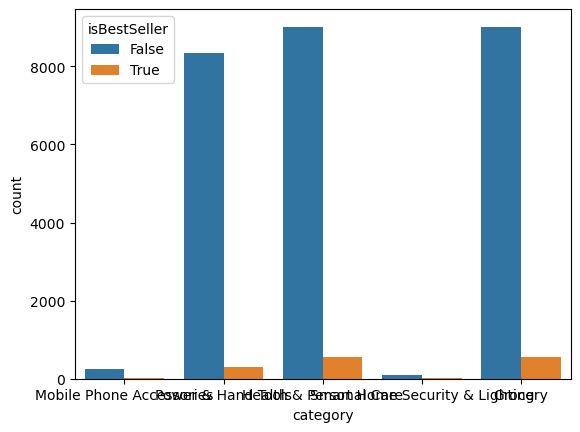

In [112]:
# Grouped bar chart for top 5 categories
sns.countplot(data=filtered_df, x='category', hue='isBestSeller')
plt.show()

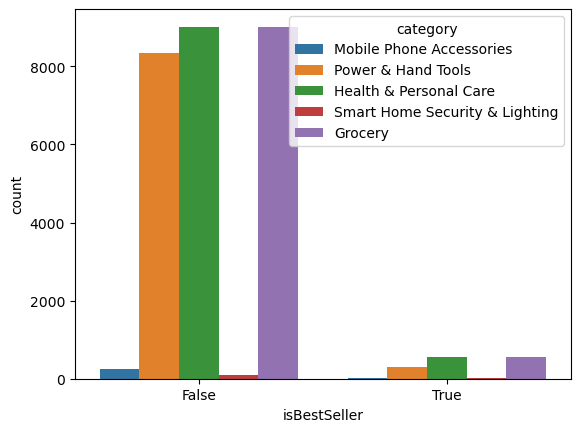

In [114]:
# Grouped bar chart for top 5 categories
sns.countplot(data=filtered_df, x='isBestSeller', hue='category')
plt.show()

In [80]:
category_percentages

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
1690349,1903774,B0973RP7H3,Meta Quest 2 - Advanced All-In-One VR Headset ...,4.7,10992,299.00,True,1000,Mobile Phones & Communication
1666121,1873340,B00CTY4AQU,PME Large Sugar Pearls White 90 g,4.4,940,2.99,True,500,Grocery
2225305,2572304,B017N18C1W,HOMCOM Children Kids Rocking Horse Toys Giraff...,4.7,622,45.99,True,200,Baby
1290405,1426861,B0010YQJZ0,"VELCRO Brand ONE-WRAP Plant Ties Tape, 12mm x ...",4.6,4078,3.22,True,500,Gardening
1290402,1426858,B09NJJ2FXS,"Abimars Garden Fleece 30gsm, 2m x 5m Horticult...",4.5,621,10.99,True,600,Gardening
...,...,...,...,...,...,...,...,...,...
815767,890676,B0819WSSX2,DACHSHUND Indoor birch wood plant pot holder. ...,0.0,0,90.00,False,0,Made in Italy Handmade
815768,890677,B0813SYRFF,VENETIAURUM - Woman’s bracelet with 925 sterli...,0.0,0,67.00,False,0,Made in Italy Handmade
815769,890678,B0813SHXGF,Venetiaurum - Earrings with Original Murano Gl...,0.0,0,32.70,False,0,Made in Italy Handmade
815770,890679,B0813S6SY5,Venetiaurum - Long Earrings with Original Mura...,0.0,0,45.60,False,0,Made in Italy Handmade


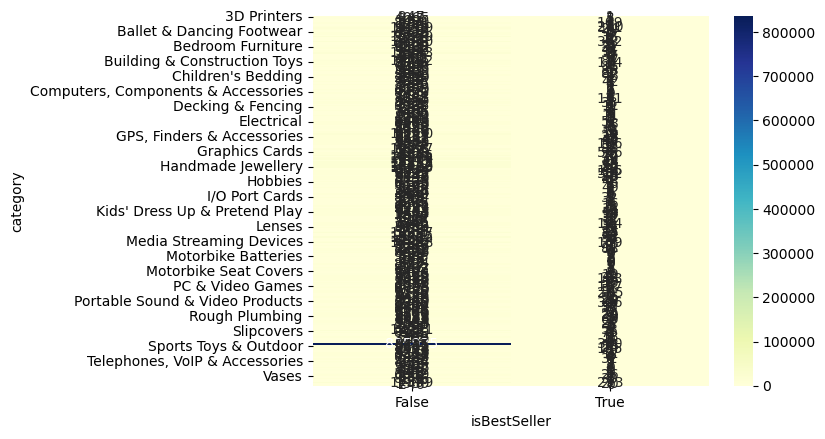

In [30]:
import seaborn as sns

# Plotting a heatmap for the 'crosstab_result' data, annotating each cell with the value, using the "YlGnBu" color map and formatting numbers as integers
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")
plt.show()

In [46]:
# 1.2.1. Statistical Tests: Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
category, isBestSeller, _, _ = chi2_contingency(crosstab_result)

category, isBestSeller

(36540.20270061387, 0.0)

In [ ]:
# P-value is very low at 0.0. Given the extremely low ( p )-value, we reject the null hypothesis.
# This implies that there's a significant association between 'category' and 'isBestSeller' in the dataset.

In [48]:
# 1.2.2. Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer")

0.1222829439760564

In [ ]:
# The Cramér's V value of 0.12 suggests a weak association between the two variables.
# Though statistically significant, the strength of this relationship is not very strong in practical terms.

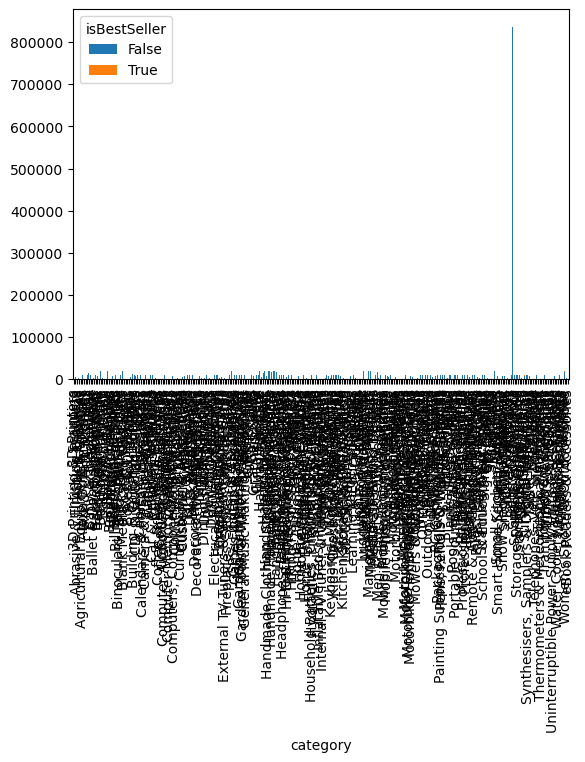

In [50]:
# 1.3.1. Visualizations: Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)
plt.show()

In [ ]:
# 2.0. Exploring Product Prices and Ratings Across Categories and Brands
# Preliminary Step: Remove outliers in product prices.

In [58]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [62]:
data_series = df['isBestSeller']
outliers = tukeys_test_outliers(data_series)
print(outliers)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.